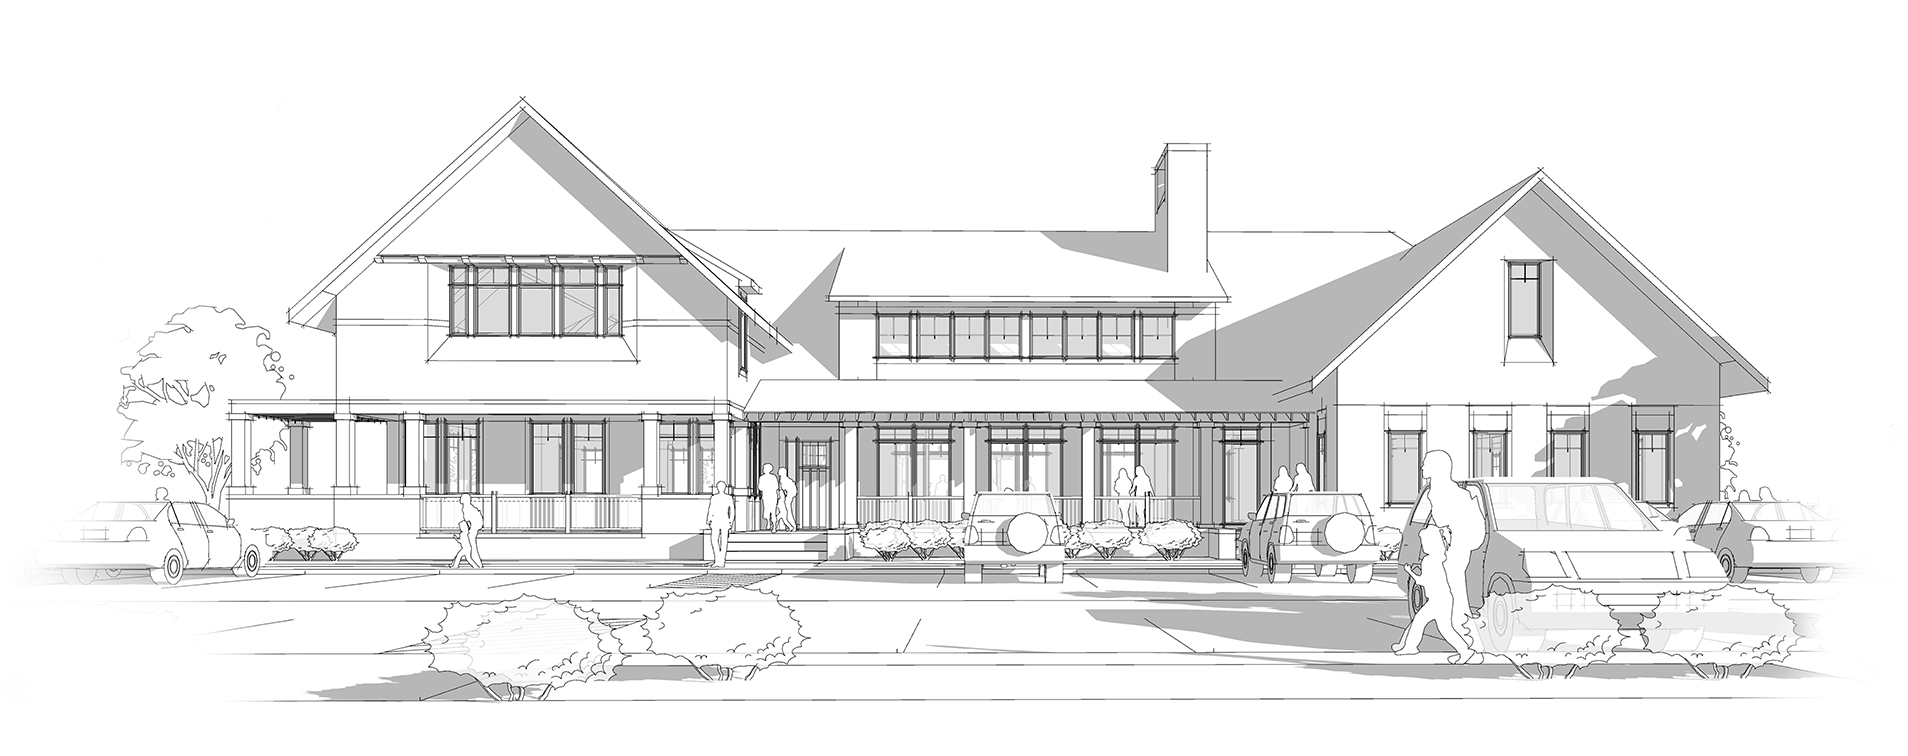

# Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part Time
* Scheduled project review date/time: 11/3/21
* Instructor name: Claude Fried
* Blog post URL:


# Overview

We are given the dataset to Kings County, Washington housing sales from 2014-2015 to provide price predictions for housing architects to help determine what qualities of a house they should consider when making their floor plan. After gathering information from our analysis and modeling we have focused on evaluting for housing prices in the range of 78,000 to 1,120,000.


* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Overview of Data

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
house_df.info()
house_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(21597, 21)

In [4]:
# columns to take a closer look at
# look at the unique values for price
house_df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [5]:
# sanity check missing values
house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning & Exploring

Plan 
- Set the columns(waterfront, view, yr_renovated) with missing values to '0'
- Replace column dtypes for necessary columns


In [7]:
# check the value counts for each column.
for value in house_df.columns:
    print(value) # column name
    print(house_df[value].value_counts(ascending=False)) # distribution of frequently occuring values
    print('                               ')

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
                               
date
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/15/2015      1
2/15/2015      1
5/24/2015      1
11/2/2014      1
8/3/2014       1
Name: date, Length: 372, dtype: int64
                               
price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
                               
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
                               
bathrooms
2.50    5377
1.00    38

In [8]:
# Fill missing values and fix the dtypes
# need to drop the bedroom outlier
# is sqft_above & sqft_basement = sqft_living?
# drop ID since it is an identifer and won't give us any results when compared to price

# change missing values to the median 0
house_df['waterfront'].fillna(0, inplace=True)
# convert from float to int
house_df['waterfront'] = house_df['waterfront'].astype('int64')

# change missing values to the median 0
house_df['view'].fillna(0, inplace=True)
# convert from float to int
house_df['view'] = house_df['view'].astype('int64')

# change missing values to the median 0
house_df['yr_renovated'].fillna(0, inplace=True)
# convert from float to int
house_df['yr_renovated'] = house_df['yr_renovated'].astype('int64')

# replace '?' values to the median and then converting from float to int
house_df['sqft_basement'] = house_df['sqft_basement'].replace(to_replace='?',value=0)
house_df['sqft_basement'] = pd.to_numeric(house_df['sqft_basement'])
house_df['sqft_basement'] = house_df['sqft_basement'].astype('int64')

# convert zipcode to string
house_df['zipcode'] = house_df['zipcode'].astype(str)

# drop ID column
house_df.drop(columns = ['id'], axis=1, inplace=True)

# drop date column
house_df.drop(columns = ['date'], axis=1, inplace=True)

# drop yr_renovated column
house_df.drop(columns = ['yr_renovated'], axis=1, inplace=True)

# drop yr_built column
house_df.drop(columns = ['yr_built'], axis=1, inplace=True)

# drop yr_built column
house_df.drop(columns = ['waterfront'], axis=1, inplace=True)

# drop lat & long column

house_df.drop(columns = ['lat', 'long'], axis=1, inplace=True)

# double check data summary 
house_df.info()
house_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  zipcode        21597 non-null  object 
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# id has multiple counts that means there are duplicate housing info on here
# is it safe to drop the duplicated data? check the %
# house_data.duplicated('id').value_counts()

In [10]:
# checking the percentage of duplicated data for 'id'
# its best to get rid of this column 
# house_data.duplicated('id').mean()

In [11]:
# everything looks the same except the date and price
# the same houses were sold twice
# lets keep the latest house sold
# visually compare?
# house_data[house_data.duplicated(subset=['id'], keep=False)]

In [12]:
# is sqft_above & sqft_basement = sqft_living?
# how to check properly?
# possibly drop one of them?

above_basement_sum = house_df['sqft_above'] + house_df['sqft_basement']
above_basement_sum

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Length: 21597, dtype: int64

In [13]:
house_df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

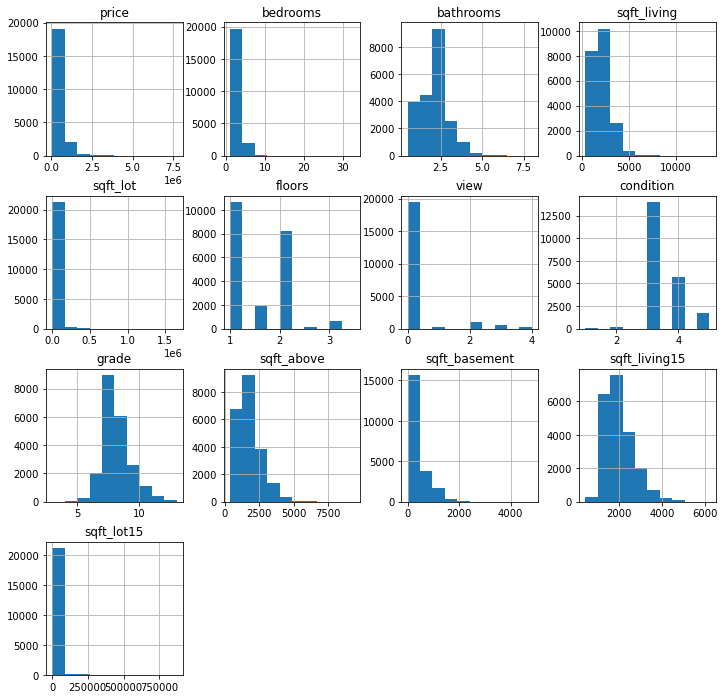

In [14]:
house_df.hist(figsize=(12,12));

A lot of the variables are not normally distributed. An option to combat this is to feature engineer the variables to make this more normally distributed Next we will check which features are continuous and categorical

In [15]:
def make_scatterplot_feature(data):
    TARGET = 'price'
    X_VALS = [x_col for x_col in house_df.columns if x_col != TARGET]
    
    for x in X_VALS:
        sns.scatterplot(x=x, y=TARGET, data=data)#.set(title=f'Price by {X_VALS}')        
        plt.show()

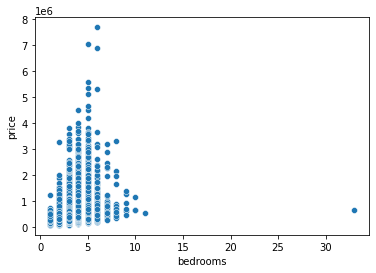

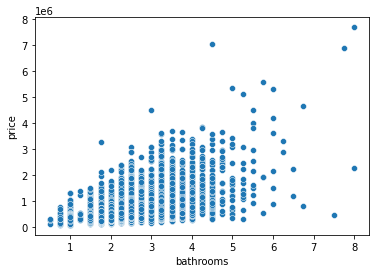

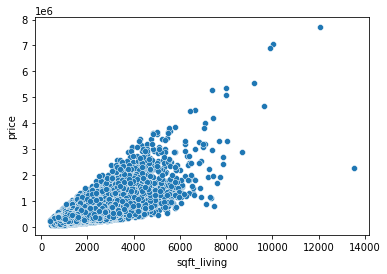

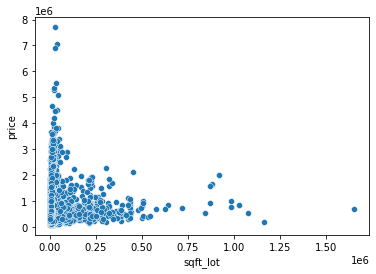

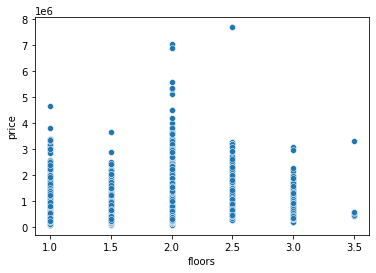

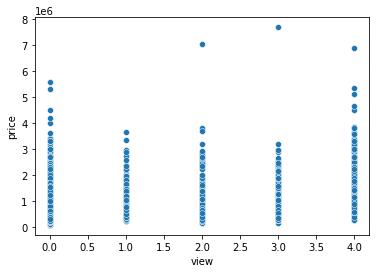

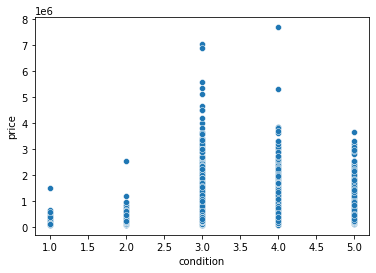

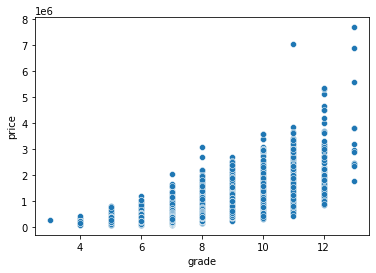

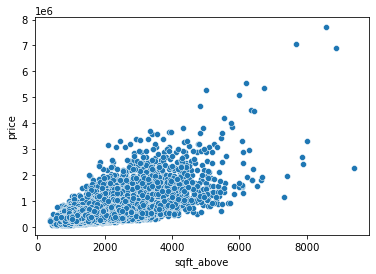

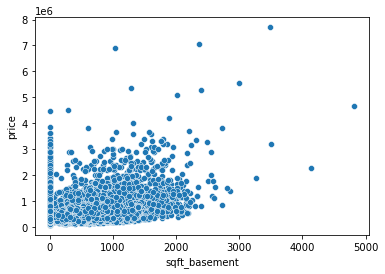

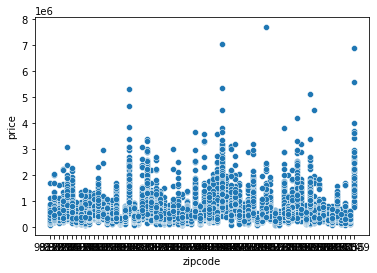

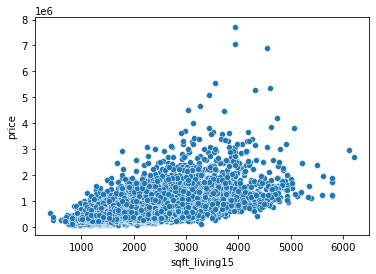

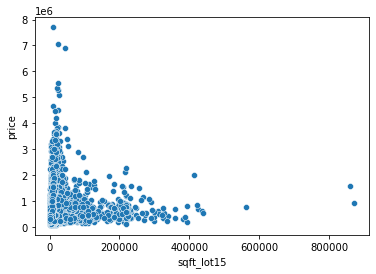

In [16]:
make_scatterplot_feature(house_df)

Looking at the scatterplots between the features will help us determine the numerical and categorical variables in regards to price. The scatter plots that show vertical line structrue will be our catergorical variables while the graphs with a cloud structure will be our numerical variables.

In [17]:
# # plotting the housing data by months sold
# # count of houses sold throughout the year
# months = ['January','February','March','April','May','June','July','August','September','October','November','December']
# monthly_sales = []
# house_data['date'] = pd.to_datetime(house_data['date'])

# for i in range(1,13):
#     monthly_sales.append(sum(house_data.date.dt.month == i))
    
# plt.figure(figsize=(12,4))
# norm = plt.Normalize(0,max(monthly_sales))
# colors = plt.cm.Blues(norm(monthly_sales))

# sns.barplot(months, monthly_sales, palette = 'Blues')
# plt.title('Sales by Month')
# plt.ylabel('values')
# plt.show()

The housing market seems to be a lot more active in the summer than the winter months. We'll check back on this.

### Feature Engineering

In [18]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  zipcode        21597 non-null  object 
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


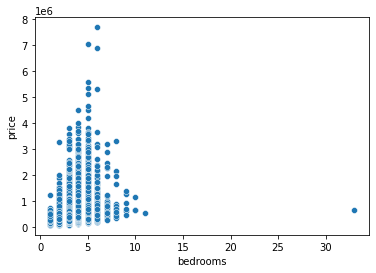

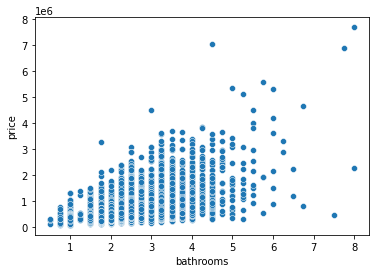

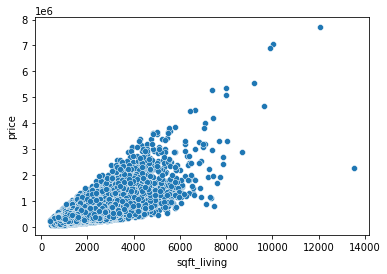

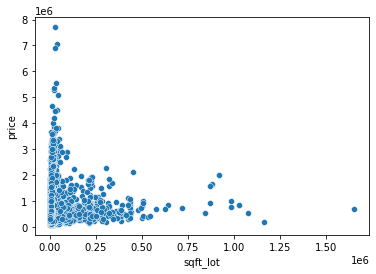

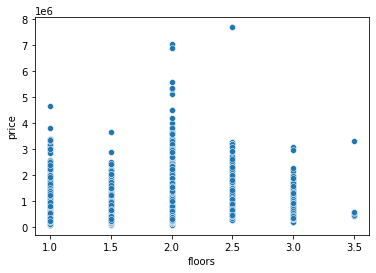

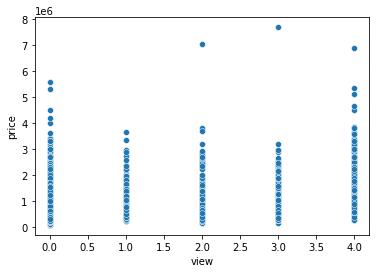

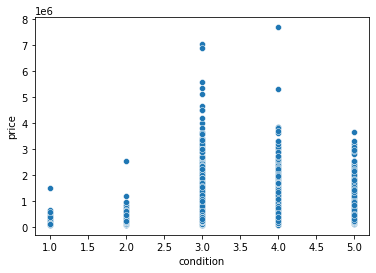

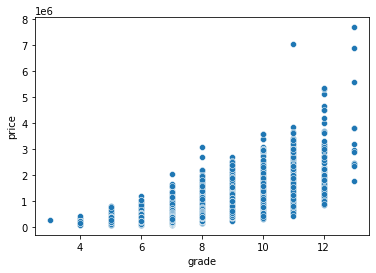

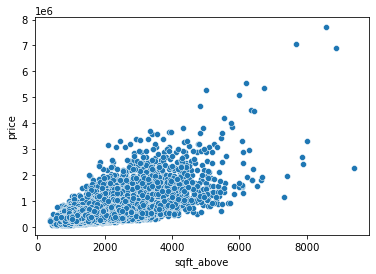

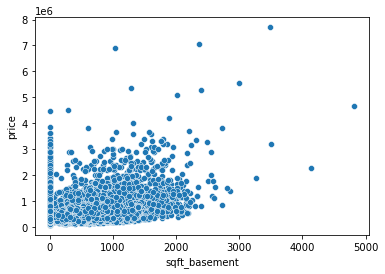

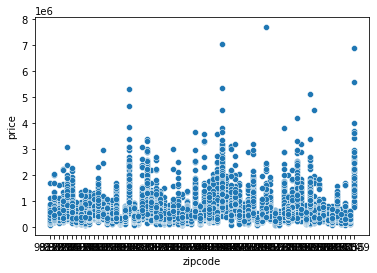

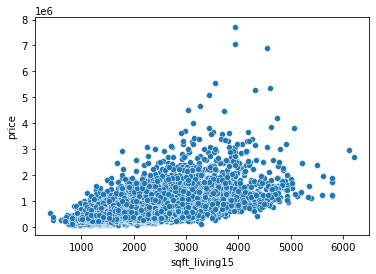

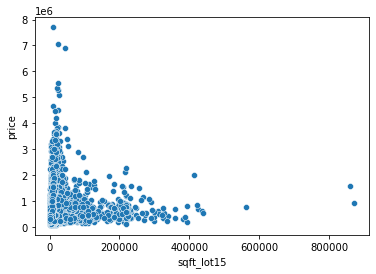

In [19]:
make_scatterplot_feature(house_df)

In [20]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
num_var = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

cat_var = ['bedrooms', 'bathrooms', 'floors', 'condition', 
           'grade', 'zipcode']

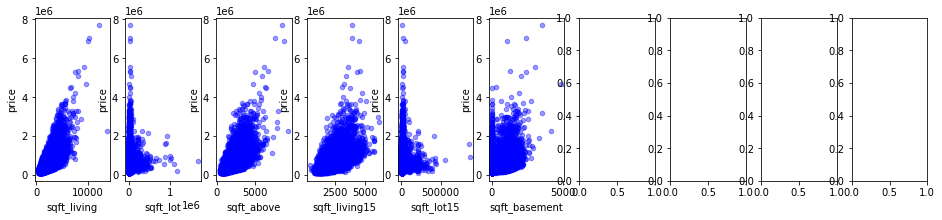

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(16,3))

for xcol, ax in zip(num_var, axes):
    house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

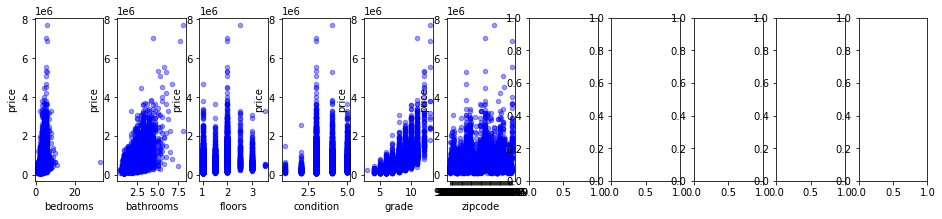

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=11, figsize=(16,3))

for xcol, ax in zip(cat_var, axes):
    house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### Multicollinearity Check
- When the independent variables are related to each other
- Indiates that changes in one predictor are associated with changes in another one as well

In [24]:
def make_heatmap(data):
    TARGET = 'price'
    FEATURES = [x_col for x_col in data.columns if x_col != TARGET]
    
    corr = data[FEATURES].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(15, 15))
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True)

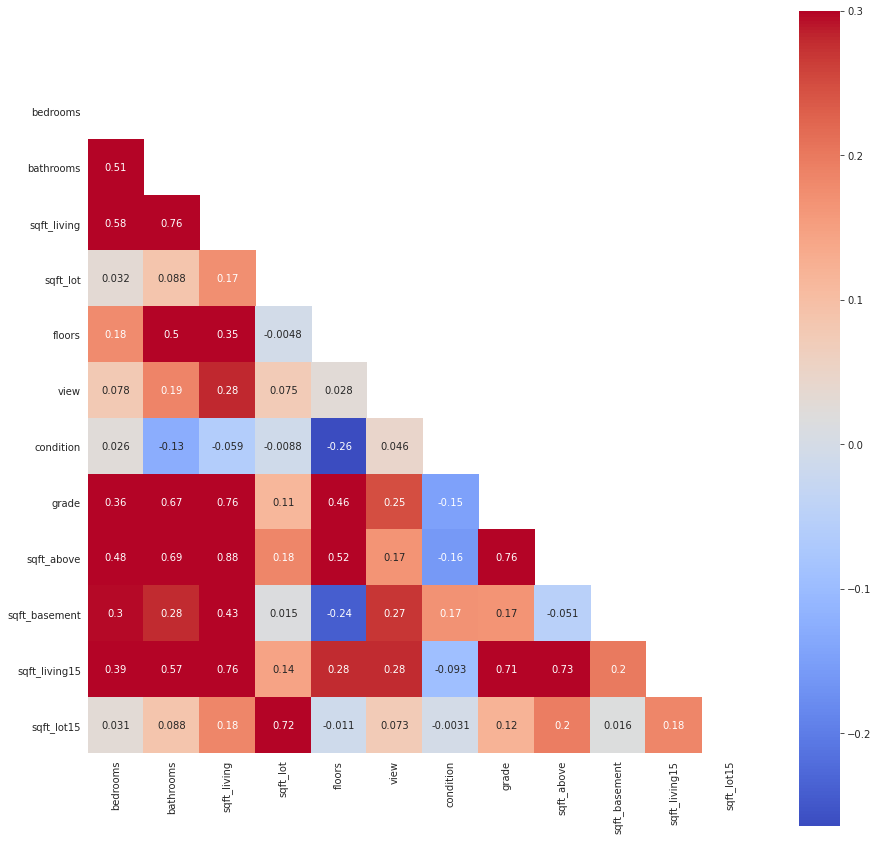

In [25]:
make_heatmap(house_df)

- Dark red represents strong positive linear relationships
- Dark blue presents strong negative linear relationships
- r > .65 produces multicollinearity in a model
- Multicollinearity is when there is high correlation between three or more variables

In [26]:
# pd.plotting.scatter_matrix(house_data[FEATURES],figsize  = [15,15]);
# plt.show()

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

TARGET = 'price'
FEATURES = [x_col for x_col in house_df.columns if x_col != TARGET]

high_corr=house_df[FEATURES].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
high_corr['pairs'] = list(zip(high_corr.level_0, high_corr.level_1))

# set index to pairs
high_corr.set_index(['pairs'], inplace = True)

#drop level columns
high_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
high_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
high_corr.drop_duplicates(inplace=True)

In [27]:
high_corr[(high_corr.cc>.65) & (high_corr.cc <1)][(high_corr.cc>.65) & (high_corr.cc <1)]

<ipython-input-27-8bf7edaade49>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_corr[(high_corr.cc>.65) & (high_corr.cc <1)][(high_corr.cc>.65) & (high_corr.cc <1)]


,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(grade, sqft_living15)",0.713867
"(bathrooms, sqft_above)",0.686668


In [28]:
# drop the highly correlated variables
# gotta do something about grades, bathrooms, sqft_living
house_df.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,400,98125
2,180000.0,2,1.00,770,10000,1.0,0,3,6,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,910,98136
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,0,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,3,8,0,98103
21593,400000.0,4,2.50,2310,5813,2.0,0,3,8,0,98146
21594,402101.0,2,0.75,1020,1350,2.0,0,3,7,0,98144
21595,400000.0,3,2.50,1600,2388,2.0,0,3,8,0,98027


In [29]:
house_df.columns
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  zipcode        21597 non-null  object 
dtypes: float64(3), int64(7), object(1)
memory usage: 1.8+ MB


#### Removing Outliers
- removing outliers using IQR & boxplots

In [30]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,285.716581
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,439.819830
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,550.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,4820.000000


In [31]:
# define a function that return box plots of the columns
def plot_boxplot(data, cols):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.boxplot(x=cols, data=data, ax=ax)

In [32]:
# define a function that will return a list of index outliers
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(abs(lower_bound),upper_bound)
    
    lst = df.index[(df[col] < lower_bound) |( df[col] > upper_bound)]
    
    return lst

In [33]:
# empty list to store the output indices from multiple rows
index_list = []
for feature in ['price']:
    index_list.extend(outliers(house_df, feature))


162500.0 1129500.0


In [34]:
# define function that will return the cleaned house_data without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [35]:
house_df = remove(house_df, index_list)

In [36]:
def barplot_clean(data, feature_clean):
    data = data.groupby(feature_clean).median().reset_index().sort_values('price')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x=data[feature_clean],y=data['price'], data=data, palette='vlag')
    
    ax.set_title(f'Median Price for {feature_clean.title()}')
    plt.xlabel(feature_clean)
    plt.ylabel('Price in millions')
    ax.set_xticklabels(labels=data[feature_clean], rotation=270)

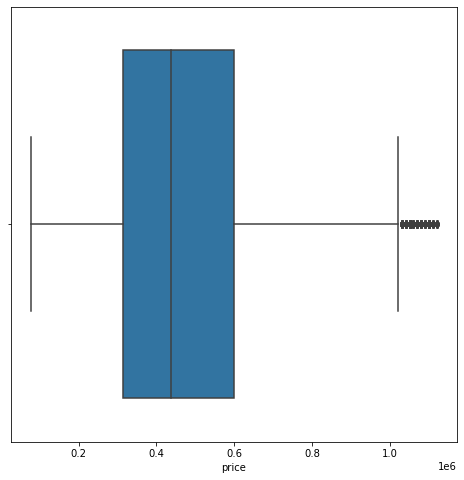

In [37]:
plot_boxplot(house_df, 'price')

In [38]:
house_df['bedrooms'].value_counts()

3     9597
4     6304
2     2736
5     1335
6      225
1      195
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [39]:
house_df = house_df[house_df['bedrooms'] < 7]

In [40]:
house_df = house_df[house_df['floors'] < 3.5]

In [41]:
house_df = house_df[(house_df.grade > 4)  &  (house_df.grade < 12)]

In [42]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement
count,2.035300e+04,20353.000000,20353.000000,20353.000000,2.035300e+04,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000
mean,4.766019e+05,3.322262,2.049722,1973.297155,1.459294e+04,1.475139,0.171523,3.407016,7.534074,260.832064
std,2.075006e+05,0.858311,0.703979,768.150339,4.008567e+04,0.535811,0.639156,0.646725,1.026301,404.796583
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,5.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,0.000000
50%,4.374000e+05,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,0.000000
75%,6.000000e+05,4.000000,2.500000,2430.000000,1.030000e+04,2.000000,0.000000,4.000000,8.000000,500.000000
max,1.120000e+06,6.000000,5.500000,7350.000000,1.651359e+06,3.000000,4.000000,5.000000,11.000000,2720.000000


Price range is from 78,000 to 1,120,000

In [43]:
# % of data we'll be using
(20392/21597) * 100

94.42052136870862

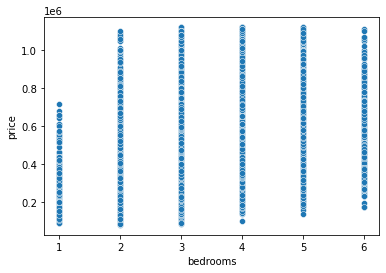

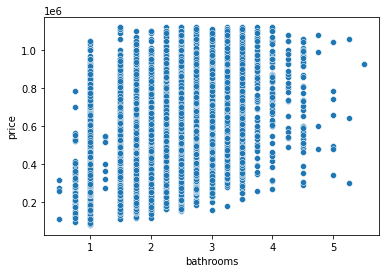

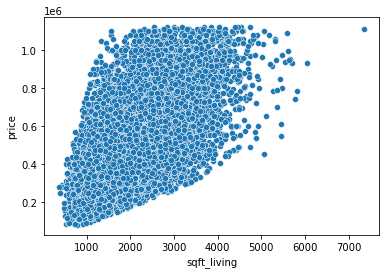

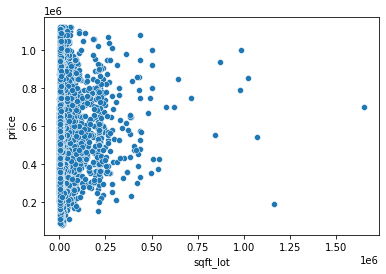

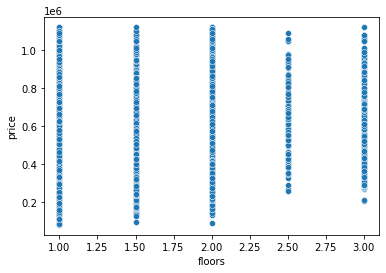

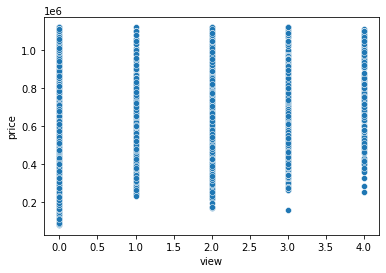

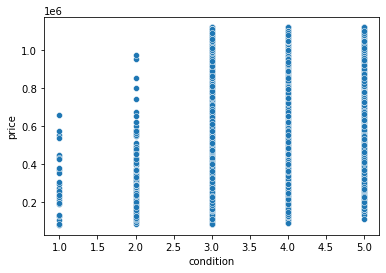

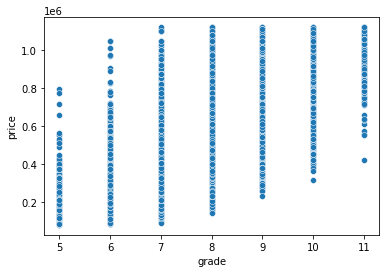

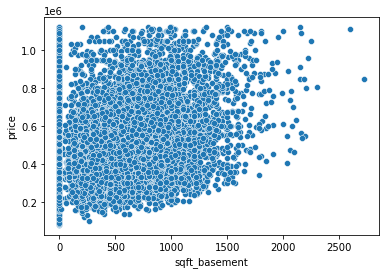

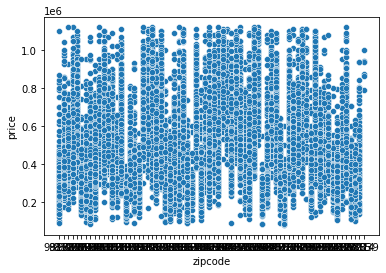

In [44]:
make_scatterplot_feature(house_df)

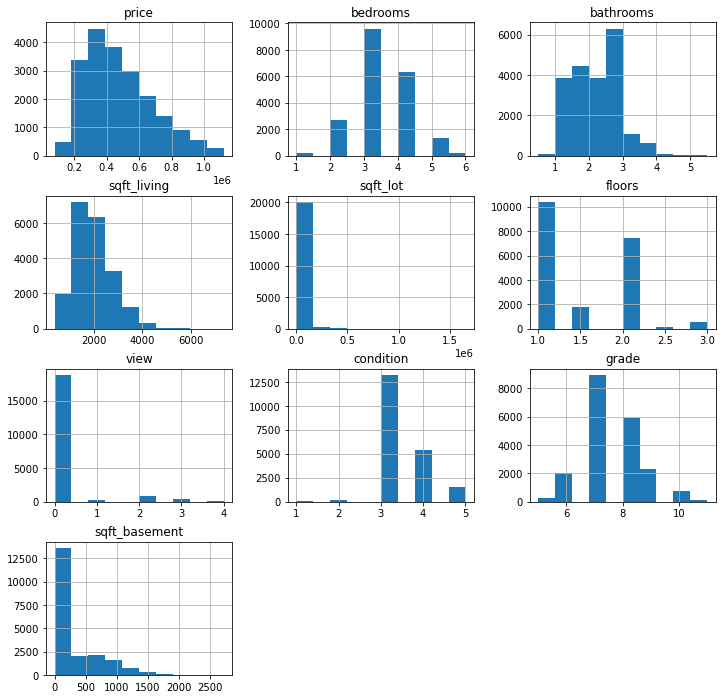

In [45]:
house_df.hist(figsize=(12,12));

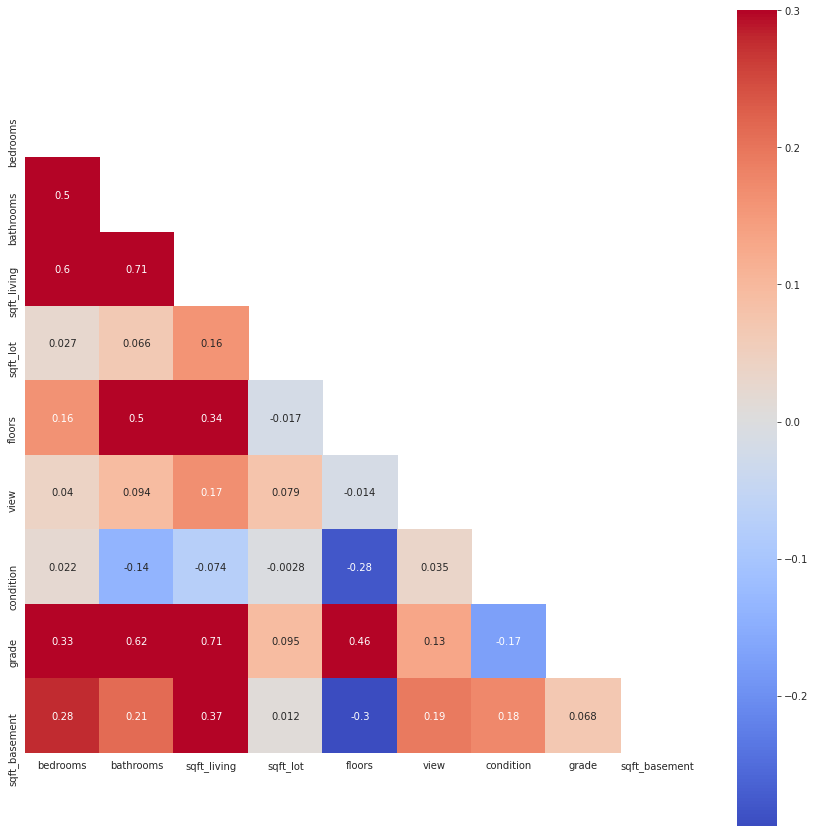

In [46]:
make_heatmap(house_df)

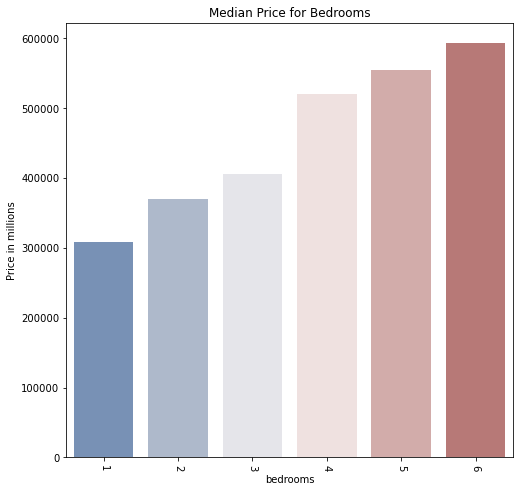

In [110]:
barplot_clean(house_df, 'bedrooms')

### Categorical Dummies

In [47]:
# house_df['grade'].value_counts()

In [48]:
# grades_dummies = pd.get_dummies(house_df.grade, prefix='grade', drop_first=True)
# grades_dummies.info()

In [49]:
# pd.cut(house_df.grade, bins = (5,6,7,9,12)).value_counts()

In [50]:
# house_df['grades_bins'] = pd.cut(house_df.grade, bins = (5,6,7,9,12), labels =['dropped', 'fair', 'good', 'excellent'])
# house_df['grades_bins'].value_counts()

In [51]:
# grades_dummies = pd.get_dummies(house_df.grades_bins, prefix='grade', drop_first=True)
# grades_dummies.info()

In [52]:
# house_df = pd.concat([house_df, grades_dummies], axis = 1)

In [53]:
# house_df.drop(columns = ['grades_bins', 'grade'], inplace = True)

In [54]:
# house_df.info()

In [55]:
# bedroom_dummies = pd.get_dummies(house_df.bedrooms, prefix='bedroom', drop_first=True)
# bedroom_dummies.info()

In [56]:
# def barplot(feature_var):
#     data = house_data.groupby(feature_var).median().reset_index().sort_values('price')
#     fig, ax = plt.subplots(figsize=(8,8))
#     sns.barplot(x=data[feature_var],y=data['price'], data=data, palette='vlag')
    
#     ax.set_title(f'Median Price for {feature_var.title()}')
#     plt.xlabel(feature_var)
#     plt.ylabel('Price in millions')
#     ax.set_xticklabels(labels=data[feature_var], rotation=270,)

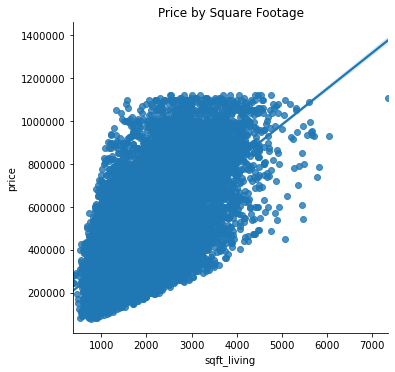

In [57]:
sns.lmplot(y='price', x='sqft_living', data=house_df).set(title='Price by Square Footage')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

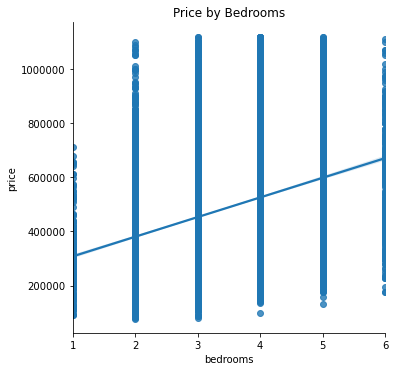

In [58]:
sns.lmplot(y='price', x='bedrooms', data=house_df).set(title='Price by Bedrooms')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Looking at Lat & Long Coordinates

In [59]:
# # plot the long and lat coordinates by price
# plt.figure(figsize=(20,18))
# sns.scatterplot(x = 'long', y = 'lat', data=house_data_clean, hue = 'price')
# plt.title("Prices Around the Longitute and Latitude Coordinates")
# plt.xlabel("long")
# plt.ylabel("lat")
# plt.grid()
# plt.show()


In [60]:
# plt.figure(figsize=(20,18))
# sns.scatterplot(x = 'long', y = 'lat', data=house_data_clean, hue = 'sqft_living')
# plt.title("Longitute and Latitude Coordinates by Footage of Home")
# plt.xlabel("long")
# plt.ylabel("lat")
# plt.grid()
# plt.show()


# Linear Regression Models

Lets build a linear regression model with all the variables to see how it affects the price individually. Some variables to look out for is our R^2, p-values, and the coefficients. 

Keep in mind: 
- R^2 explains how 'accurate' our regression model is and it is a good predictor for the dependent variable. % of variance we can explain by the model
- p-values explains how statstically significant the variables are (smaller the p-value the more statistically significant they are)
- coefficient - explains whether the price goes up or down

### Test-Train Split
Split the dataset into two parts.
- Uses sample data for training 75%
- Uses remaining samples for testing model 25%

In [61]:
def test_train_split(data, TARGET, test_size, random_state = 100):
    
    data = data.copy()
    
    # Separate independant variables from dependant variable.
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    return X_train, X_test, y_train, y_test

### OHE

In [62]:
def test_train_split_OHE(data, TARGET, test_size, random_state = 100):
    data = data.copy()
    
    # Separate independant variables from dependant variable.
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    # OHE categorical variable process
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = ohe.fit_transform(X_train[cat])
    X_train_ohe = pd.DataFrame(X_train_ohe, 
                               columns = ohe.get_feature_names(cat))

    X_test_ohe = ohe.transform(X_test[cat])
    X_test_ohe = pd.DataFrame(X_test_ohe, 
                              columns = ohe.get_feature_names(cat))
    
    # Combine OHE data.
    X_train_ohe_com = pd.concat([X_train[num], 
                         X_train_ohe], 
                        axis=1)
    X_test_ohe_com = pd.concat([X_test[num], 
                        X_test_ohe], 
                       axis=1)
    
    return X_train_ohe_com, X_test_ohe_com, y_train, y_test

### Transform using StandardScaler()
- Scales the values while taking into account standard deviation. This will help reduce the effect of outliers in   features.
- mu = 0
- pop std = 1

We only transform the numerical categories that aren't ordinal

In [63]:
def test_train_scale_ohe(data, TARGET, test_size, random_state = 100):
    
    data = data.copy()
    
    # test-train-split process
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size = test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    # OHE categorical variable process
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = ohe.fit_transform(X_train[cat])
    X_train_ohe = pd.DataFrame(X_train_ohe, 
                               columns = ohe.get_feature_names(cat))

    X_test_ohe = ohe.transform(X_test[cat])
    X_test_ohe = pd.DataFrame(X_test_ohe, 
                              columns = ohe.get_feature_names(cat))
    
    
    # Scale numerical x_variables process
    scale = StandardScaler()
    X_train_num = scale.fit_transform(X_train[num])
    X_train_num = pd.DataFrame(X_train_num, columns=num)
    
    # Transform to dataframes.
    X_test_num = scale.transform(X_test[num])
    X_test_num = pd.DataFrame(X_test_num, columns = num)
    
    # Combine processed data.
    X_train_processed = pd.concat([X_train_num, X_train_ohe], 
                                  axis=1).reset_index(drop=True)
    X_test_processed = pd.concat([X_test_num, X_test_ohe], axis=1)

    y_train = y_train.reset_index(drop=True)
    
    return X_train_processed, X_test_processed, y_train, y_test

### Assumption of Linear Regression 

1. *Residual Normality*
    - `sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)`
    - *Omnibus Value*
    
    
2. *Homoskedasticity*
    - *Durbin-Watson*
    - ~1.5 - ~2.5
    
    
3. *Multicollinearity*
    - *VIF* (`variance_inflation_factor()`)
    - VIF > 5 - highly collinear
    - VIF > 10 - must remove
    
4. *Overfitting* 
    - RMSE
    - MSE
    - A big difference between the test and training rest (R)MSE is an indication of overfitting

In [64]:
def check_normality(model):
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.show()

In [65]:
def create_vif_dct(dataframe, const_col_name='const'):
    
    if const_col_name not in dataframe.columns:
        dataframe = sm.add_constant(dataframe)
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    X_cols = [c for c in df.columns.to_list() if c not in ['price']]
    X = df[X_cols]
    pd.set_option('display.float_format', '{:.2f}'.format)
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['features'] = X.columns
    
    return vif

In [66]:
from statsmodels.stats.stattools import durbin_watson

def homoscedasticity(model):
    durbinwaston = durbin_watson(model)
    return f" Durbin Watson Score : {durbinwaston} "

In [67]:
# def visualize_homoscedasticity(model, df):
    
#     X_cols = [c for c in df.columns.to_list() if c not in ['price']]
    
#     fig = plt.figure(figsize=(15,8))
#     fig = sm.graphics.plot_regress_exog(model, X_cols, fig=fig)
#     fig.tight_layout()
#     plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

def check_overfit(X_train, X_test, y_train, y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    train_residuals = y_pred_train - y_train
    test_residuals = y_pred_test - y_test

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    print('RMSE Train:', np.sqrt(mse_train))
    print('RMSE Test:', np.sqrt(mse_test))

    print('R2 Score:', round(r2_score(y_test, y_pred_test),3))

## Model 1 - Initial Model

In [69]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'zipcode'],
      dtype='object')

In [70]:
model1_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'zipcode']

In [71]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df[model1_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [72]:
create_vif_dct(X_train_processed)

,VIF,features
0,54.52,const
1,1.76,bedrooms
2,2.72,bathrooms
3,4.45,sqft_living
4,1.24,sqft_lot
...,...,...
74,1.62,zipcode_98177
75,1.69,zipcode_98178
76,1.37,zipcode_98188
77,1.77,zipcode_98198


In [73]:
model_1 = sm.OLS(y_train, sm.add_constant(X_train_processed)).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.826      
Dependent Variable:     price              AIC:                  390353.9944
Date:                   2021-11-08 12:50   BIC:                  390957.0213
No. Observations:       15264              Log-Likelihood:       -1.9510e+05
Df Model:               78                 F-statistic:          929.2      
Df Residuals:           15185              Prob (F-statistic):   0.00       
R-squared:              0.827              Scale:                7.4425e+09 
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const         302547.4892  5155.6954  58.6822 0.0000 292441.7065 312653.2720
bedrooms       -3164.3633   926.6891  -3.4147 0.0006  -4980.7853  -1347.9413
bathrooms       5775.0333  1152.5607   5.0106 0.0000   3515.8757   8034.1909
sqft_living   101571.0238  1473.2070  68.9455 0.0000  98683.3610 104458.6866
sqft_lot       11600.7401   777.8400  14.9140 0.0000  10076.0801  13125.4001
floors        -14273.2451  1041.0693 -13.7102 0.0000 -16313.8662 -12232.6241
view           24404.2384   751.3344  32.4812 0.0000  22931.5327  25876.9441
condition      16609.9884   756.8576  21.9460 0.0000  15126.4565  18093.5203
grade          45401.1130  1155.3684  39.2958 0.0000  43136.4521  47665.7739
sqft_basement -22189.6799   984.2818 -22.5440 0.0000 -24118.9906 -20260.3692
zipcode_98002   5096.5857  8505.0168   0.5992 0.5490 -11574.2698  21767.4411
zipcode_98003  -8160.4355  7957.0853  -1.0256 0.3051 -23757.2793   7436.4083
zipcode_98004 526117.7692  9432.7997  55.7754 0.0000 507628.3479 544607.1906
zipcode_98005 335074.4154  9646.5558  34.7351 0.0000 316166.0064 353982.8245
zipcode_98006 275815.6811  7298.4556  37.7910 0.0000 261509.8307 290121.5314
zipcode_98007 265295.9774  9975.0075  26.5961 0.0000 245743.7635 284848.1913
zipcode_98008 245518.4299  7971.9999  30.7976 0.0000 229892.3517 261144.5080
zipcode_98010  78216.3966 10984.9174   7.1203 0.0000  56684.6379  99748.1553
zipcode_98011 150081.7227  8893.0510  16.8763 0.0000 132650.2736 167513.1718
zipcode_98014  97473.3869 10529.8799   9.2568 0.0000  76833.5563 118113.2174
zipcode_98019 106140.3163  8978.3688  11.8218 0.0000  88541.6340 123738.9986
zipcode_98022 -12230.0096  8293.5694  -1.4746 0.1403 -28486.4026   4026.3835
zipcode_98023 -18256.1902  6825.1712  -2.6748 0.0075 -31634.3463  -4878.0341
zipcode_98024 144013.6041 13023.4800  11.0580 0.0000 118486.0176 169541.1907
zipcode_98027 194087.4402  7274.0488  26.6822 0.0000 179829.4300 208345.4505
zipcode_98028 137083.3525  7953.5089  17.2356 0.0000 121493.5188 152673.1862
zipcode_98029 226985.8422  7715.8626  29.4181 0.0000 211861.8238 242109.8605
zipcode_98030   3690.6258  8158.9892   0.4523 0.6510 -12301.9738  19683.2255
zipcode_98031  10732.0531  8021.6665   1.3379 0.1810  -4991.3776  26455.4839
zipcode_98032  -9686.3954 10218.7796  -0.9479 0.3432 -29716.4319  10343.6411
zipcode_98033 331085.1094  7312.8245  45.2746 0.0000 316751.0943 345419.1245
zipcode_98034 186428.0467  6789.5004  27.4583 0.0000 173119.8098 199736.2837
zipcode_98038  39249.4693  6606.5558   5.9410 0.0000  26299.8258  52199.1128
zipcode_98039 647566.8622 50089.9932  12.9281 0.0000 549384.4536 745749.2707
zipcode_98040 433239.5223  9397.7257  46.1005 0.0000 414818.8501 451660.1946
zipcode_98042   7204.6371  6695.3479   1.0761 0.2819  -5919.0497  20328.3238
zipcode_98045  99428.8433  8734.0877  11.3840 0.0000  82308.9813 116548.7053
zipcode_98052 260088.0132  6665.3621  39.0208 0.0000 247023.1021 273152.9243
zipcode_98053 234912.7285  7272.1936  32.3029 0.0000 220658.3548 249167.1021
zipcode_98055  41742.2269  7904.4443   5.2809 0

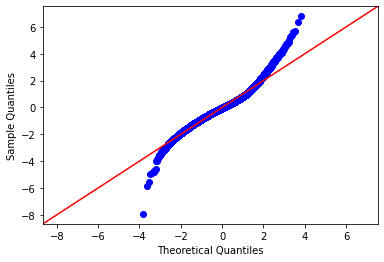

In [74]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [75]:
homoscedasticity(model_1.resid)

' Durbin Watson Score : 2.0229481435654884 '

In [76]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 7403936833.35163
Test MSE: 7889715363.3738365
RMSE Train: 86046.13200691609
RMSE Test: 88824.06972985328
R2 Score: 0.82


## Models - Without location

Lets take a closer look into what qualities of a house is important.

In [77]:
model2_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'view', 'condition', 'sqft_basement', 'grade']

In [78]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df[model2_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [79]:
create_vif_dct(X_train_processed)

,VIF,features
0,1.00,const
1,1.69,bedrooms
2,2.61,bathrooms
3,3.82,sqft_living
4,1.88,floors
5,1.06,view
6,1.11,condition
7,1.62,sqft_basement
8,2.41,grade


In [80]:
model_2 = sm.OLS(y_train, sm.add_constant(X_train_processed)).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.502      
Dependent Variable:    price              AIC:                  406323.3592
Date:                  2021-11-08 12:50   BIC:                  406392.0585
No. Observations:      15264              Log-Likelihood:       -2.0315e+05
Df Model:              8                  F-statistic:          1925.      
Df Residuals:          15255              Prob (F-statistic):   0.00       
R-squared:             0.502              Scale:                2.1285e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         474818.5649 1180.8609 402.0953 0.0000 472503.9364 477133.1933
bedrooms      -10622.2029 1534.7384  -6.9212 0.0000 -13630.4736  -7613.9322
bathrooms     -14142.4880 1908.0016  -7.4122 0.0000 -17882.3992 -10402.5768
sqft_living    71751.8834 2307.2777  31.0981 0.0000  67229.3435  76274.4234
floors         14186.2000 1617.8609   8.7685 0.0000  11014.9993  17357.4006
view           22072.2037 1217.6396  18.1270 0.0000  19685.4845  24458.9228
condition      26454.0417 1241.5878  21.3066 0.0000  24020.3812  28887.7023
sqft_basement  16786.5546 1504.5931  11.1569 0.0000  13837.3723  19735.7369
grade          86621.0263 1834.2740  47.2236 0.0000  83025.6300  90216.4226
---------------------------------------------------------------------------
Omnibus:                718.384          Durbin-Watson:             1.996  
Prob(Omnibus):          0.000            Jarque-Bera (JB):          858.830
Skew:                   0.515            Prob(JB):                  0.000  
Kurtosis:               3.537            Condition No.:             4      
===========================================================================

"""

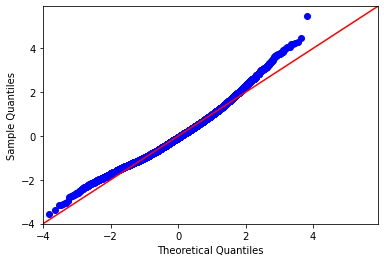

In [81]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [82]:
homoscedasticity(model_2.resid)

' Durbin Watson Score : 1.9960150713536966 '

In [83]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 21272066482.39314
Test MSE: 22491449450.990467
RMSE Train: 145849.4651426365
RMSE Test: 149971.49546160587
R2 Score: 0.488


## Models - Unscaled

In [84]:
model3_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_basement', 'zipcode', 'grade']

In [85]:
X_train_ohe_com, X_test_ohe_com, y_train, y_test = test_train_split_OHE(house_df[model3_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [86]:
create_vif_dct(X_train_ohe_com)

,VIF,features
0,201.94,const
1,1.76,bedrooms
2,2.72,bathrooms
3,4.45,sqft_living
4,1.24,sqft_lot
...,...,...
74,1.62,zipcode_98177
75,1.69,zipcode_98178
76,1.37,zipcode_98188
77,1.77,zipcode_98198


In [87]:
model_3 = sm.OLS(y_train, sm.add_constant(X_train_ohe_com)).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.826      
Dependent Variable:      price               AIC:                   390353.9944
Date:                    2021-11-08 12:50    BIC:                   390957.0213
No. Observations:        15264               Log-Likelihood:        -1.9510e+05
Df Model:                78                  F-statistic:           929.2      
Df Residuals:            15185               Prob (F-statistic):    0.00       
R-squared:               0.827               Scale:                 7.4425e+09 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
const         -340286.7105  9922.7543 -34.2936 0.0000 -359736.5018 -320836.9192
bedrooms        -3673.1609  1075.6913  -3.4147 0.0006   -5781.6451   -1564.6766
bathrooms        8206.3028  1637.7849   5.0106 0.0000    4996.0475   11416.5582
sqft_living       131.5972     1.9087  68.9455 0.0000     127.8559     135.3385
sqft_lot            0.3087     0.0207  14.9140 0.0000       0.2681       0.3492
floors         -26607.1491  1940.6860 -13.7102 0.0000  -30411.1270  -22803.1713
view            38230.9540  1177.0181  32.4812 0.0000   35923.8570   40538.0509
condition       25714.5532  1171.7200  21.9460 0.0000   23417.8413   28011.2652
sqft_basement     -54.8305     2.4322 -22.5440 0.0000     -59.5979     -50.0632
grade           44366.3211  1129.0350  39.2958 0.0000   42153.2769   46579.3654
zipcode_98002    5096.5857  8505.0168   0.5992 0.5490  -11574.2698   21767.4411
zipcode_98003   -8160.4355  7957.0853  -1.0256 0.3051  -23757.2793    7436.4083
zipcode_98004  526117.7692  9432.7997  55.7754 0.0000  507628.3479  544607.1906
zipcode_98005  335074.4154  9646.5558  34.7351 0.0000  316166.0064  353982.8245
zipcode_98006  275815.6811  7298.4556  37.7910 0.0000  261509.8307  290121.5314
zipcode_98007  265295.9774  9975.0075  26.5961 0.0000  245743.7635  284848.1913
zipcode_98008  245518.4299  7971.9999  30.7976 0.0000  229892.3517  261144.5080
zipcode_98010   78216.3966 10984.9174   7.1203 0.0000   56684.6379   99748.1553
zipcode_98011  150081.7227  8893.0510  16.8763 0.0000  132650.2736  167513.1718
zipcode_98014   97473.3869 10529.8799   9.2568 0.0000   76833.5563  118113.2174
zipcode_98019  106140.3163  8978.3688  11.8218 0.0000   88541.6340  123738.9986
zipcode_98022  -12230.0096  8293.5694  -1.4746 0.1403  -28486.4026    4026.3835
zipcode_98023  -18256.1902  6825.1712  -2.6748 0.0075  -31634.3463   -4878.0341
zipcode_98024  144013.6041 13023.4800  11.0580 0.0000  118486.0176  169541.1907
zipcode_98027  194087.4402  7274.0488  26.6822 0.0000  179829.4300  208345.4505
zipcode_98028  137083.3525  7953.5089  17.2356 0.0000  121493.5188  152673.1862
zipcode_98029  226985.8422  7715.8626  29.4181 0.0000  211861.8238  242109.8605
zipcode_98030    3690.6258  8158.9892   0.4523 0.6510  -12301.9738   19683.2255
zipcode_98031   10732.0531  8021.6665   1.3379 0.1810   -4991.3776   26455.4839
zipcode_98032   -9686.3954 10218.7796  -0.9479 0.3432  -29716.4319   10343.6411
zipcode_98033  331085.1094  7312.8245  45.2746 0.0000  316751.0943  345419.1245
zipcode_98034  186428.0467  6789.5004  27.4583 0.0000  173119.8098  199736.2837
zipcode_98038   39249.4693  6606.5558   5.9410 0.0000   26299.8258   52199.1128
zipcode_98039  647566.8622 50089.9932  12.9281 0.0000  549384.4536  745749.2707
zipcode_98040  433239.5223  9397.7257  46.1005 0.0000  414818.8501  451660.1946
zipcode_98042    7204.6371  6695.3479   1.0761 0.2819   -5919.0497   20328.3238
zipcode_98045   99428.8433  8734.0877  11.3840 0.0000   82308.9813  116548.7053
zipcode_98052  260088.0132  6665.3621  39.0208 0.0000  

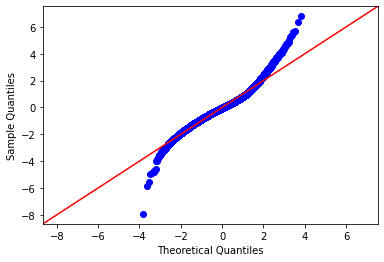

In [88]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [89]:
homoscedasticity(model_3.resid)

' Durbin Watson Score : 2.0229481435646934 '

In [90]:
check_overfit(X_train_ohe_com, X_test_ohe_com, y_train, y_test)

Train MSE: 7403936833.351631
Test MSE: 7889715363.372854
RMSE Train: 86046.1320069161
RMSE Test: 88824.06972984775
R2 Score: 0.82


# Categorical Variables

Ordinal variables to look out for 
- bedroom
- bathrooms
- floors
- waterfront
- condition
- grade
- zipcode
- months_sold
- house_age

## Models - Categorical Dummies

In [91]:
# create dummies for floors, bedroom, house_age

In [92]:
house_df_dummies = house_df.copy()

In [93]:
house_df_dummies.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'zipcode'],
      dtype='object')

In [94]:
floors_dummies = pd.get_dummies(house_df.floors, prefix='floors', drop_first=True)
floors_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20353 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   floors_1.5  20353 non-null  uint8
 1   floors_2.0  20353 non-null  uint8
 2   floors_2.5  20353 non-null  uint8
 3   floors_3.0  20353 non-null  uint8
dtypes: uint8(4)
memory usage: 238.5 KB


In [95]:
bedrooms_dummies = pd.get_dummies(house_df_dummies.bedrooms, prefix='bedrooms')
bedrooms_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20353 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bedrooms_1  20353 non-null  uint8
 1   bedrooms_2  20353 non-null  uint8
 2   bedrooms_3  20353 non-null  uint8
 3   bedrooms_4  20353 non-null  uint8
 4   bedrooms_5  20353 non-null  uint8
 5   bedrooms_6  20353 non-null  uint8
dtypes: uint8(6)
memory usage: 278.3 KB


In [96]:
house_df_dummies = pd.concat([house_df_dummies, floors_dummies, bedrooms_dummies], axis = 1)


In [97]:
house_df_dummies

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,floors_1.5,floors_2.0,floors_2.5,floors_3.0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,221900.00,3,1.00,1180,5650,1.00,0,3,7,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.00,3,2.25,2570,7242,2.00,0,3,7,400,...,0,1,0,0,0,0,1,0,0,0
2,180000.00,2,1.00,770,10000,1.00,0,3,6,0,...,0,0,0,0,0,1,0,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,0,5,7,910,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1680,8080,1.00,0,3,8,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,0,3,8,0,...,0,0,0,1,0,0,1,0,0,0
21593,400000.00,4,2.50,2310,5813,2.00,0,3,8,0,...,0,1,0,0,0,0,0,1,0,0
21594,402101.00,2,0.75,1020,1350,2.00,0,3,7,0,...,0,1,0,0,0,1,0,0,0,0
21595,400000.00,3,2.50,1600,2388,2.00,0,3,8,0,...,0,1,0,0,0,0,1,0,0,0


In [98]:
house_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20353 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20353 non-null  float64
 1   bedrooms       20353 non-null  int64  
 2   bathrooms      20353 non-null  float64
 3   sqft_living    20353 non-null  int64  
 4   sqft_lot       20353 non-null  int64  
 5   floors         20353 non-null  float64
 6   view           20353 non-null  int64  
 7   condition      20353 non-null  int64  
 8   grade          20353 non-null  int64  
 9   sqft_basement  20353 non-null  int64  
 10  zipcode        20353 non-null  object 
 11  floors_1.5     20353 non-null  uint8  
 12  floors_2.0     20353 non-null  uint8  
 13  floors_2.5     20353 non-null  uint8  
 14  floors_3.0     20353 non-null  uint8  
 15  bedrooms_1     20353 non-null  uint8  
 16  bedrooms_2     20353 non-null  uint8  
 17  bedrooms_3     20353 non-null  uint8  
 18  bedroo

In [99]:
house_df_dummies.drop(columns = ['bedrooms', 'floors'], inplace = True)

In [100]:
house_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20353 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20353 non-null  float64
 1   bathrooms      20353 non-null  float64
 2   sqft_living    20353 non-null  int64  
 3   sqft_lot       20353 non-null  int64  
 4   view           20353 non-null  int64  
 5   condition      20353 non-null  int64  
 6   grade          20353 non-null  int64  
 7   sqft_basement  20353 non-null  int64  
 8   zipcode        20353 non-null  object 
 9   floors_1.5     20353 non-null  uint8  
 10  floors_2.0     20353 non-null  uint8  
 11  floors_2.5     20353 non-null  uint8  
 12  floors_3.0     20353 non-null  uint8  
 13  bedrooms_1     20353 non-null  uint8  
 14  bedrooms_2     20353 non-null  uint8  
 15  bedrooms_3     20353 non-null  uint8  
 16  bedrooms_4     20353 non-null  uint8  
 17  bedrooms_5     20353 non-null  uint8  
 18  bedroo

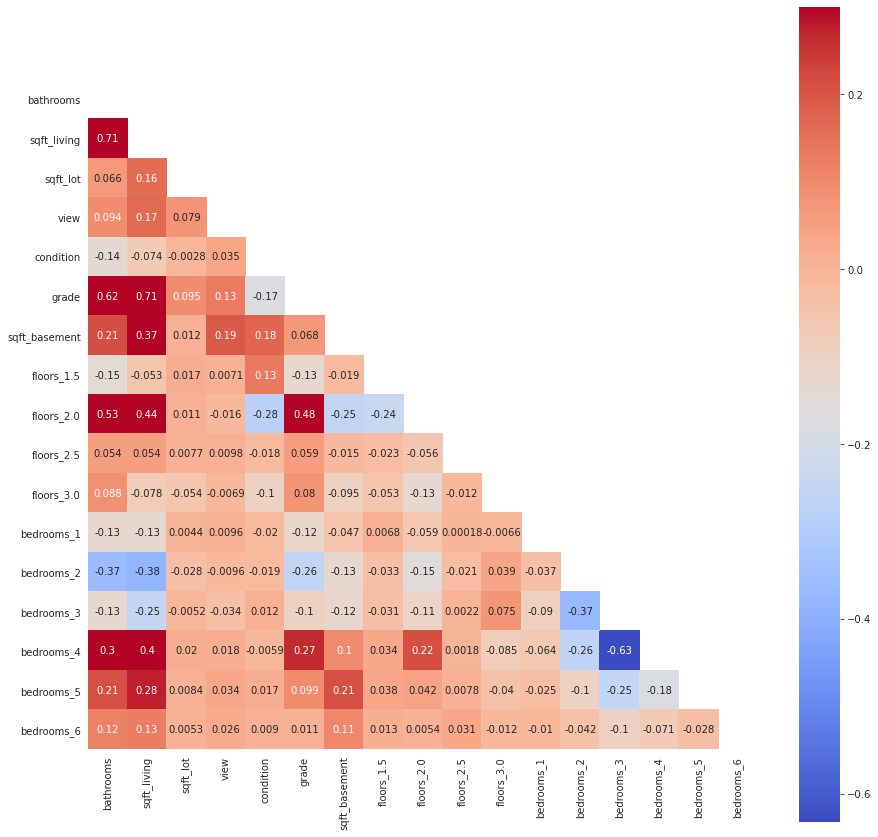

In [101]:
make_heatmap(house_df_dummies)

In [102]:
house_df_dummies.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition',
       'grade', 'sqft_basement', 'zipcode', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6'],
      dtype='object')

In [103]:
model4_cols = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade',
       'sqft_basement', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6']

In [104]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df_dummies[model4_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [105]:
create_vif_dct(X_train_processed)

C:\Users\myrna\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.00,const
1,2.77,bathrooms
2,4.31,sqft_living
3,1.06,sqft_lot
4,1.07,view
5,1.13,condition
6,2.48,grade
7,1.79,sqft_basement
8,1.12,floors_1.5
9,2.37,floors_2.0


In [106]:
model_4 = sm.OLS(y_train, sm.add_constant(X_train_processed)).fit()
model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.520      
Dependent Variable:    price              AIC:                  405768.4166
Date:                  2021-11-08 12:50   BIC:                  405898.1819
No. Observations:      15264              Log-Likelihood:       -2.0287e+05
Df Model:              16                 F-statistic:          1035.      
Df Residuals:          15247              Prob (F-statistic):   0.00       
R-squared:             0.521              Scale:                2.0514e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         474818.5649 1159.2854 409.5787 0.0000 472546.2269 477090.9028
bathrooms      -3636.8107 1929.3053  -1.8850 0.0594  -7418.4797    144.8584
sqft_living    71035.7513 2405.6009  29.5293 0.0000  66320.4859  75751.0167
sqft_lot       -1611.8602 1195.5988  -1.3482 0.1776  -3955.3768    731.6564
view           20839.2406 1198.2575  17.3913 0.0000  18490.5127  23187.9685
condition      23800.3024 1230.8155  19.3370 0.0000  21387.7568  26212.8479
grade          91799.7840 1826.1448  50.2697 0.0000  88220.3219  95379.2461
sqft_basement  13202.1891 1550.9129   8.5125 0.0000  10162.2143  16242.1639
floors_1.5     25964.5465 1228.7999  21.1300 0.0000  23555.9519  28373.1412
floors_2.0      1465.9175 1784.6790   0.8214 0.4114  -2032.2668   4964.1018
floors_2.5      3702.2738 1178.3293   3.1420 0.0017   1392.6074   6011.9401
floors_3.0      8687.3297 1271.3648   6.8331 0.0000   6195.3026  11179.3568
bedrooms_1      6122.2374 1167.0655   5.2458 0.0000   3834.6494   8409.8254
bedrooms_2     15597.0154 1112.8765  14.0150 0.0000  13415.6444  17778.3865
bedrooms_3     -4513.3592  763.7693  -5.9093 0.0000  -6010.4385  -3016.2800
bedrooms_4     -5607.3925  898.6752  -6.2396 0.0000  -7368.9034  -3845.8816
bedrooms_5     -4141.7331 1149.0252  -3.6046 0.0003  -6393.9599  -1889.5062
bedrooms_6      -597.9335 1171.8613  -0.5102 0.6099  -2894.9218   1699.0548
---------------------------------------------------------------------------
Omnibus:             670.839       Durbin-Watson:          1.994           
Prob(Omnibus):       0.000         Jarque-Bera (JB):       826.941         
Skew:                0.476         Prob(JB):               0.000           
Kurtosis:            3.627         Condition No.:          2063884514913859
===========================================================================
* The condition number is large (2e+15). This might indicate
strong multicollinearity or other numerical problems.
"""

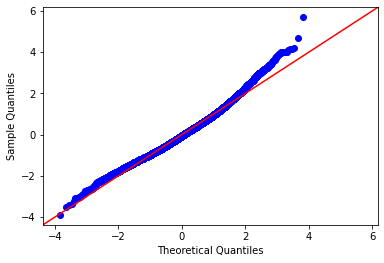

In [107]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [108]:
homoscedasticity(model_4.resid)

' Durbin Watson Score : 1.993964001490519 '

In [109]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 20491092097.11799
Test MSE: 21730945269.07191
RMSE Train: 143147.09950647966
RMSE Test: 147414.1962942237
R2 Score: 0.506


## Conclusion

Qualities of a home architects should consider increasing the square footage of the home, keep the floor level to 1.5, and a max of 2 bedrooms if they want to generate profit in Kings County, Washington.

## Future Work

- Refine to different price ranges
- Look at a more updated dataset
- Research on other features like living room square footage
- Does location have an affect of building structure (Suburb vs. City)